# 1. Read and write images

In [1]:
import cv2
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
img_path = os.path.join(os.getcwd(), "data", "uni.png")
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
trans_mask = img[:,:,3] == 0
img[trans_mask] = 255

In [3]:
print(type(img))
print(img.shape)
print(img.dtype)
print(np.max(img))
print(sys.getsizeof(img), "bytes")

<class 'numpy.ndarray'>
(1024, 1017, 4)
uint8
255
4165760 bytes


In [4]:
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

# or, convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R2 = img_rgb[:,:,0]
G2 = img_rgb[:,:,1]
B2 = img_rgb[:,:,2]

# another way to rgb
img_rgb2 = img[:,:,::-1]

print((R==R2).all())
print((G==G2).all())
print((B==B2).all())

True
True
True


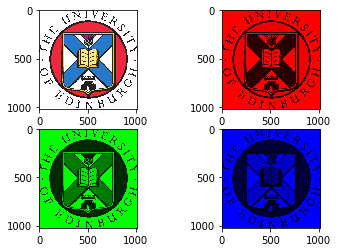

In [5]:
# show the colored image and channels
mask = np.zeros(img_rgb.shape, dtype=np.uint8)
img_r = mask.copy()
img_r[:,:,0] = R
img_g = mask.copy()
img_g[:,:,1] = G
img_b = mask.copy()
img_b[:,:,2] = B

fig, ax = plt.subplots(2, 2)
ax = ax.flatten()
ax[0].imshow(img_rgb)
ax[1].imshow(img_r)
ax[2].imshow(img_g)
ax[3].imshow(img_b)
plt.show()

In [6]:
# However, we always use [0, 1] float images to do the processing
def img2double(img):
    info = np.iinfo(img.dtype) # Get the data type of the input image
    return img.astype(np.float32) / info.max # Divide all values by the largest possible


In [7]:
img_float = img2double(img_rgb)
R = img_float[:,:,0]
G = img_float[:,:,1]
B = img_float[:,:,2]
print(img_float.dtype)
print(np.max(img_float))

float32
1.0


In [8]:
gray = cv2.cvtColor(img_float, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(img_float, cv2.COLOR_RGB2HSV)
lab = cv2.cvtColor(img_float, cv2.COLOR_RGB2LAB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


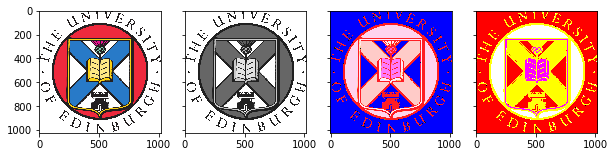

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(10, 20), sharey=True)
ax = ax.flatten()
ax[0].imshow(img_rgb)
ax[1].imshow(gray, cmap='gray')
ax[2].imshow(hsv, cmap="hsv")
ax[3].imshow(lab)
plt.show()

In [13]:
# save the image, sadly cv2.imwrite only accept image with [0, 255]
gray = cv2.convertScaleAbs(gray, alpha=255)
print(np.max(gray))
cv2.imwrite("data/Gray_logo.png", gray)

255


True

# 2. Read and write videos

In [14]:
# read a video
data_path = os.path.join(os.getcwd(), "data")
video_path = os.path.join(data_path, "plant.avi")
cap = cv2.VideoCapture(video_path)

print(cap.get(cv2.CAP_PROP_FRAME_COUNT))
video_fps = cap.get(cv2.CAP_PROP_FPS)
video_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
video_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print(video_fps)

125.0
30.0


In [15]:
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(os.path.join(data_path, "gray_video.mp4"),fourcc, int(video_fps), (int(video_width), int(video_height)), isColor=False)

# play the video
while(cap.isOpened()):
    ret, frame = cap.read()
    
    if not ret:
        break

    # if we want, we can change the frame to grayscale 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    out.write(gray)
    if cv2.waitKey(int(1000/video_fps)) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [19]:
# Record the video from camera
cap = cv2.VideoCapture(0)
# fps = cap.get(cv2.CAP_PROP_FPS)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
cap.set(cv2.CAP_PROP_FPS, 60)

# Number of frames to capture
num_frames = 120;
    
print("Capturing {0} frames".format(num_frames))

# Start time
start = time.time()
    
# Grab a few frames
for i in range(num_frames) :
    ret, frame = cap.read()
    cv2.imshow("frame", frame)
    cv2.waitKey(1)
    
# End time
end = time.time()

# Time elapsed
seconds = end - start
print("Time taken : {0} seconds".format(seconds))

# Calculate frames per second
fps  = num_frames / seconds;
print("Estimated frames per second : {0}".format(fps));

cap.release()
cv2.destroyAllWindows()

Capturing 120 frames
Time taken : 7.390471935272217 seconds
Estimated frames per second : 16.237122750886947


In [20]:
# Record the video from camera
cap = cv2.VideoCapture(0)
# fps = cap.get(cv2.CAP_PROP_FPS)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
cap.set(cv2.CAP_PROP_FPS, 60)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(os.path.join(data_path, "camera.mp4") ,fourcc, int(fps), (640,480))
print("Start recording...")
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    if ret==True:

        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()